In [2]:
from copy import deepcopy
from random import shuffle

import numpy as np
from scipy.stats import entropy

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 14})
matplotlib.rc('axes', titlesize=16)

from infomercial.util import Distribution
from infomercial.discrete.value import delta_H
from infomercial.discrete.value import entropy
from infomercial.discrete.value import surprisal
from infomercial.discrete.value import janson_shannon
from infomercial.discrete.value import mutual_information
from infomercial.discrete.value import kl_divergence
from infomercial.discrete.value import estimate_prob
from infomercial.discrete.value import delta_p

from infomercial.local_gym import BanditFourArmedDeterministicFixed

# Compare value metrics

In set of simuluted 4-arm bandit discrete distributions

In [3]:
# Sampling fns
def generate_obs(n0, n1, n2, n3):
    X = []
    X.extend([0] * n0)
    X.extend([1] * n1)
    X.extend([2] * n2)
    X.extend([3] * n3)
    shuffle(X)
    
    return X

In [4]:
# Shared params
N = 15 # Num samples
i = 1  # Target arm

## From uniform, to biased.

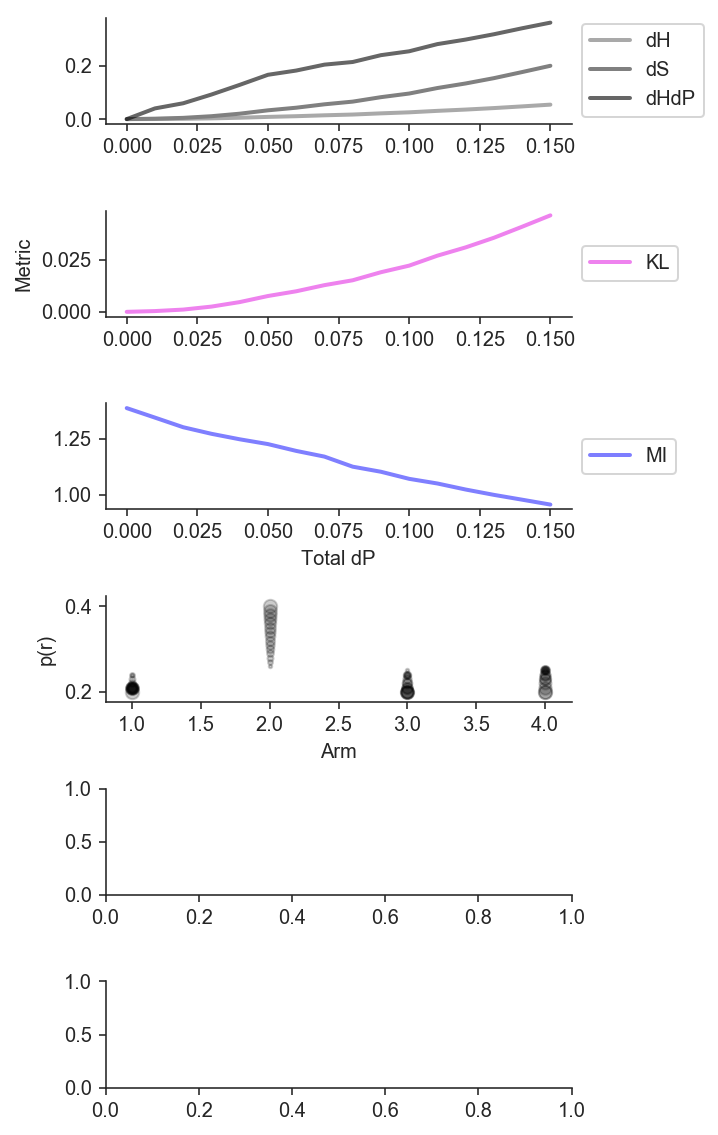

In [10]:
N = 15
X = generate_obs(25, 25, 25, 25)
Y = [deepcopy(X)]
y = deepcopy(X)

r = [0, 2, 3]
for _ in range(N):
    # Find an not i
    shuffle(r)
    n = r[0]
    loc = y.index(n)
    
    # Change to i
    y[loc] = i
    
    # Save
    Y.append(deepcopy(y))

# -
H = [entropy(y) for y in Y]
dH = [np.abs(entropy(y) - entropy(X)) for y in Y]
dS = [surprisal(X, y) for y in Y]
MI = [mutual_information(X, y) for y in Y]
KL = [kl_divergence(X, y) for y in Y]
J = [janson_shannon(X, y) for y in Y]
dP = [delta_p(X, y) for y in Y]
E = [delta_H(X, y) for y in Y]

# -
ps = np.asarray(range(N+1)) / 100
fig, ax = plt.subplots(6, sharex=False, figsize=(5, 8))
ax[0].plot(ps, dH, label='dH', color="darkgrey", linewidth=2)
ax[0].plot(ps, dS, label='dS', color="grey", linewidth=2)
ax[0].plot(ps, E, label='dHdP', color="black", alpha=0.6, linewidth=2)
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].plot(ps, KL, label='KL', color="violet", linewidth=2)
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[2].plot(ps, MI, label='MI', color="blue", alpha=0.5, linewidth=2)
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].set_ylabel("Metric")
ax[2].set_xlabel("Total dP")

for n, y in enumerate(Y):
    p = estimate_prob(y)[0]
    ax[3].scatter([1, 2, 3, 4], p, s=n*3, color="black", alpha=.2)
ax[3].set_ylabel("p(r)")
ax[3].set_xlabel("Arm")

_ = fig.tight_layout()
_ = sns.despine()

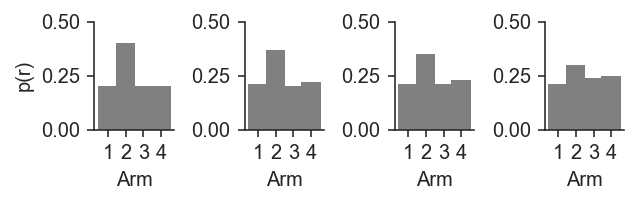

In [11]:
plot_every = [0, 3, 5, 10]
colors = ["lightgrey", "grey", "darkgrey", "black"]
ind = np.arange(4)  # the x locations for the groups
width = 0.05      # the width of the bars

fig, ax = plt.subplots(1, 4, sharex=False, figsize=(4.5, 1.5))
c = 0
for n, y in enumerate(reversed(Y)):
    if n in plot_every:
        p = estimate_prob(y)[0]
        ax[c].bar([0, 1, 2, 3], p, width=1.1, linewidth=0, color="grey")
#         ax[c].plot([0, 1, 2, 3], [0.25]*4, color="grey")
        ax[c].set_ylim(0, 0.5)
        ax[c].set_xticks(ind + width/4)
        ax[c].set_xticklabels([1, 2, 3, 4])
        ax[0].set_ylabel("p(r)")
        ax[c].set_xlabel("Arm")
        c += 1
_ = fig.tight_layout()
_ = sns.despine()

# From biased to uniform

/Users/qualia/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/qualia/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/qualia/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/qualia/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


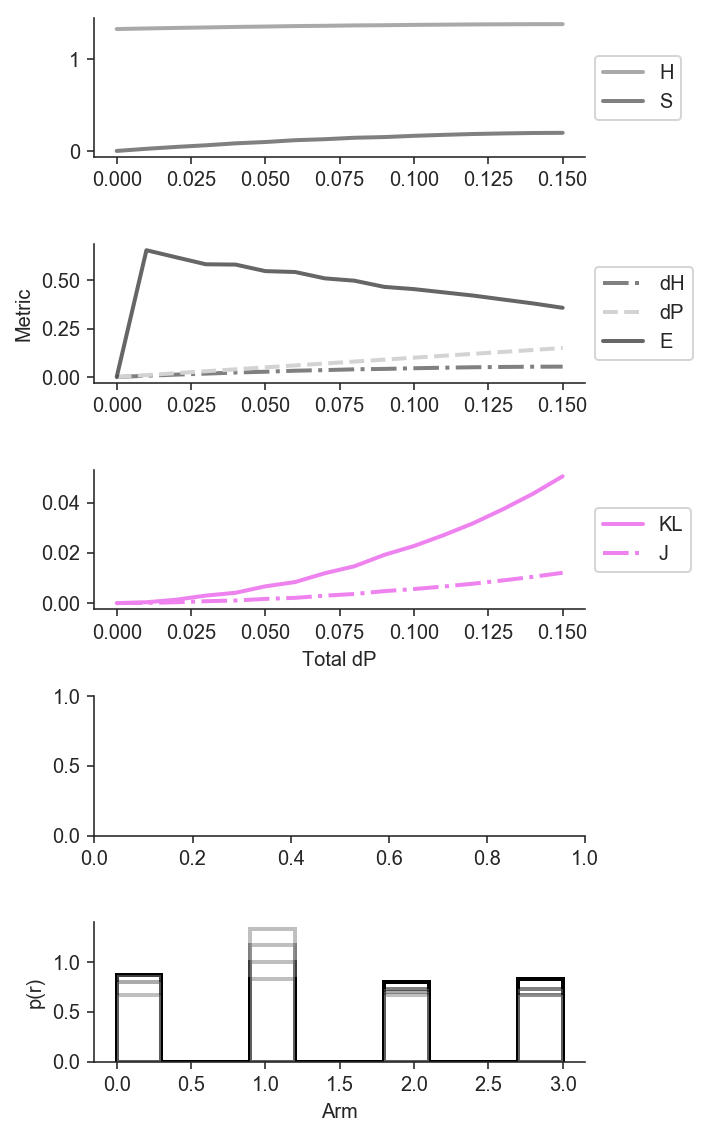

In [12]:
N = 15

X = generate_obs(20, 40, 20, 20)
Y = [deepcopy(X)]
y = deepcopy(X)

r = [0, 2, 3]
for _ in range(N):
    # Find i
    loc = y.index(i)
    
    # Pick a not i to replace it
    shuffle(r)
    n = r[0]
    
    # Change to i to not i
    y[loc] = n
    
    # Save
    Y.append(deepcopy(y))

# -
H = [entropy(y) for y in Y]
dH = [entropy(y) - entropy(X) for y in Y]
S = [surprisal(X, y) for y in Y]
MI = [mutual_information(X, y) for y in Y]
KL = [kl_divergence(X, y) for y in Y]
J = [janson_shannon(X, y) for y in Y]
dP = [delta_p(X, y) for y in Y]
E = [delta_H(X, y) for y in Y]

# -
ps = np.asarray(range(N+1)) / 100
fig, ax = plt.subplots(5, sharex=False, figsize=(5, 8))
ax[0].plot(ps, H, label='H', color="darkgrey", linewidth=2)
ax[0].plot(ps, S, label='S', color="grey", linewidth=2)
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].plot(ps, dH, label='dH', color="grey", linestyle='-.', linewidth=2)
ax[1].plot(ps, dP, label='dP', color="lightgrey", linestyle='--', linewidth=2)
ax[1].plot(ps, E, label='E', color="black", alpha=0.6, linewidth=2)
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[2].plot(ps, KL, label='KL', color="violet", linewidth=2)
ax[2].plot(ps, J, label='J', color="violet", linewidth=2, linestyle='-.')
# ax[2].plot(ps, MI, label='MI', color="blue", alpha=0.5, linewidth=2)
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].set_ylabel("Metric")
ax[2].set_xlabel("Total dP")

plot_every = len(Y) // 3
c = 0
for n, y in enumerate(reversed(Y)):
    if (n % plot_every) == 0:
        p = estimate_prob(y)[0]
        ax[4].hist(y, fc="white", ec="black", linewidth=2, normed=True, alpha=1 / (c + 1), stacked=True)
        c += 1
ax[4].set_ylabel("p(r)")
ax[4].set_xlabel("Arm")
             
_ = fig.tight_layout()
_ = sns.despine()

# Local correlations

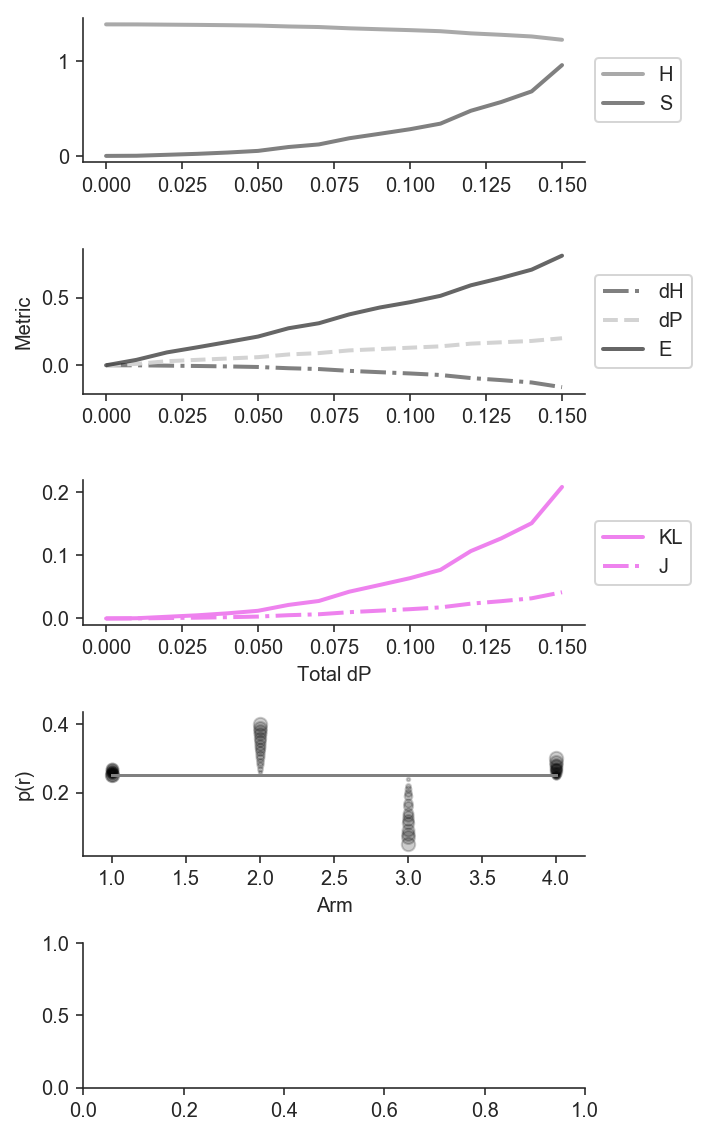

In [16]:
N = 15
X = generate_obs(25, 25, 25, 25)
Y = [deepcopy(X)]
y = deepcopy(X)

r1 = [0, 2, 3]
r2 = [0, 3]
for _ in range(N):
    # -------------------------
    # Find a not i
    shuffle(r1)
    n = r1[0]
    loc = y.index(n)
    
    # Change to i
    y[loc] = i
    
    # -------------------------
    # Find i + 1
    loc = y.index(i + 1)
    
    # Replace w/ a not i/i+1
    shuffle(r2)
    n = r2[0]
    y[loc] = n
    
    # Save
    Y.append(deepcopy(y))

# -
H = [entropy(y) for y in Y]
dH = [entropy(y) - entropy(X) for y in Y]
S = [surprisal(X, y) for y in Y]
MI = [mutual_information(X, y) for y in Y]
KL = [kl_divergence(X, y) for y in Y]
J = [janson_shannon(X, y) for y in Y]
dP = [delta_p(X, y) for y in Y]
E = [delta_H(X, y) for y in Y]

# -
ps = np.asarray(range(N+1)) / 100
fig, ax = plt.subplots(5, sharex=False, figsize=(5, 8))
ax[0].plot(ps, H, label='H', color="darkgrey", linewidth=2)
ax[0].plot(ps, S, label='S', color="grey", linewidth=2)
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].plot(ps, dH, label='dH', color="grey", linestyle='-.', linewidth=2)
ax[1].plot(ps, dP, label='dP', color="lightgrey", linestyle='--', linewidth=2)
ax[1].plot(ps, E, label='E', color="black", alpha=0.6, linewidth=2)
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[2].plot(ps, KL, label='KL', color="violet", linewidth=2)
ax[2].plot(ps, J, label='J', color="violet", linewidth=2, linestyle='-.')
# ax[2].plot(ps, MI, label='MI', color="blue", alpha=0.5, linewidth=2)
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].set_ylabel("Metric")
ax[2].set_xlabel("Total dP")

for n, y in enumerate(Y):
    p = estimate_prob(y)[0]
    ax[3].scatter([1, 2, 3, 4], p, s=n*3, color="black", alpha=.2)
    ax[3].plot([1, 2, 3, 4], [0.25]*4, color="grey")
ax[3].set_ylabel("p(r)")
ax[3].set_xlabel("Arm")
             
_ = fig.tight_layout()
_ = sns.despine()

# Global versus local

## Increasing

(0, 1)

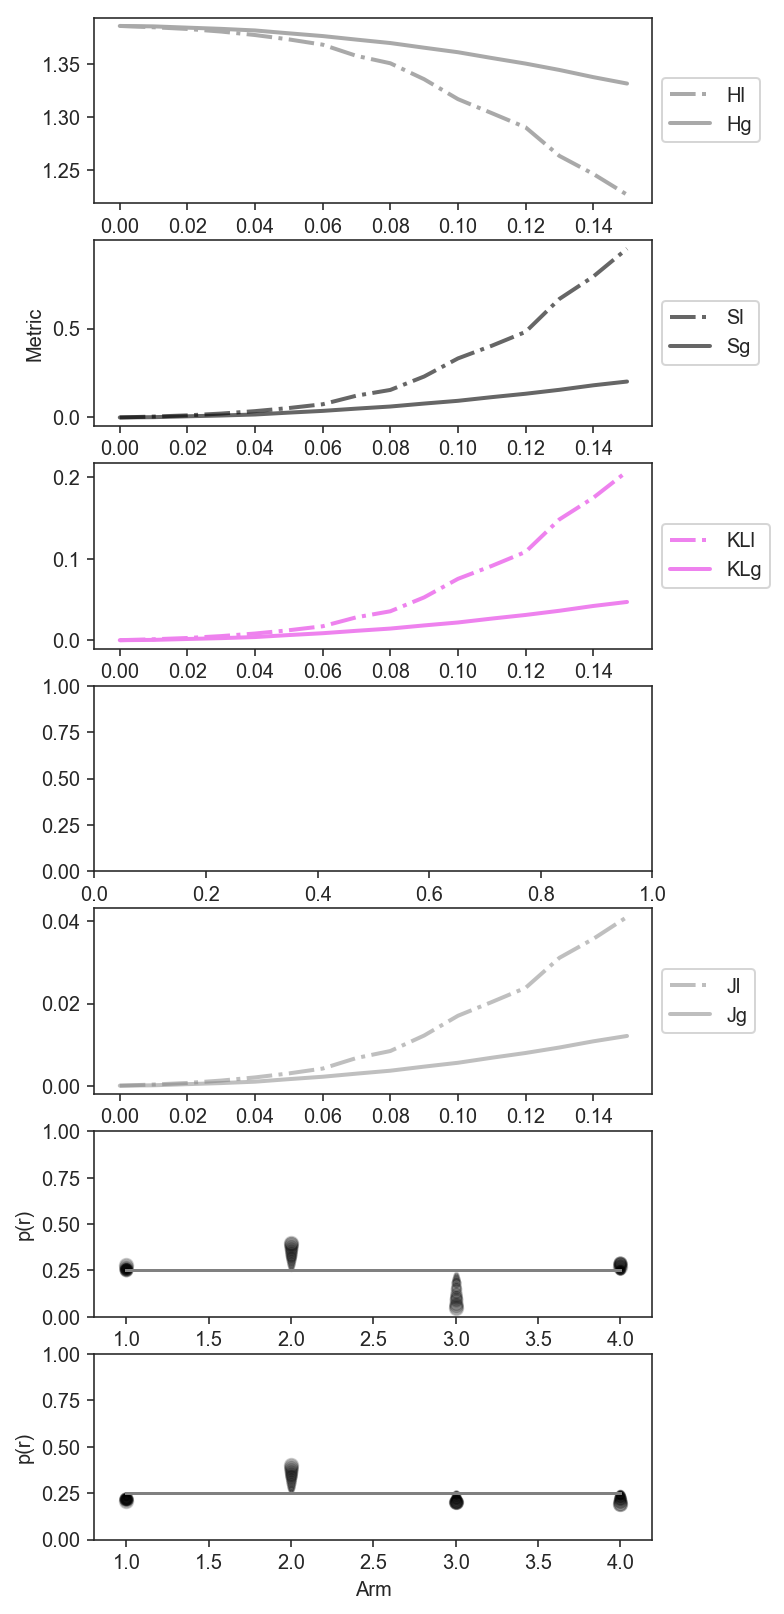

In [25]:
N = 15

# Global
X = generate_obs(25, 25, 25, 25)
Y = [deepcopy(X)]
y = deepcopy(X)

r = [0, 2, 3]
for _ in range(N):
    # Find an not i
    shuffle(r)
    n = r[0]
    loc = y.index(n)
    
    # Change to i
    y[loc] = i
    
    # Save
    Y.append(deepcopy(y))

# Save   
Yg = deepcopy(Y)

# Local
X = generate_obs(25, 25, 25, 25)
Y = [deepcopy(X)]
y = deepcopy(X)

r1 = [0, 2, 3]
r2 = [0, 3]
for _ in range(N):
    # -------------------------
    # Find a not i
    shuffle(r1)
    n = r1[0]
    loc = y.index(n)
    
    # Change to i
    y[loc] = i
    
    # -------------------------
    # Find i + 1
    loc = y.index(i + 1)
    
    # Replace w/ a not i/i+1
    shuffle(r2)
    n = r2[0]
    y[loc] = n
    
    # Save
    Y.append(deepcopy(y))
    
Yl = deepcopy(Y)

# Metrics
Hl = [entropy(y) for y in Yl]
dHl = [entropy(y) - entropy(X) for y in Yl]
Sl = [surprisal(X, y) for y in Yl]
MIl = [mutual_information(X, y) for y in Yl]
KLl = [kl_divergence(X, y) for y in Yl]
Jl = [janson_shannon(X, y) for y in Yl]
Pl = [janson_shannon(X, y) for y in Yl]
dPl = [delta_p(X, y) for y in Yl]
El = [delta_H(X, y) for y in Yl]

Hg = [entropy(y) for y in Yg]
dHg = [entropy(y) - entropy(X) for y in Yg]
Sg = [surprisal(X, y) for y in Yg]
MIg = [mutual_information(X, y) for y in Yg]
KLg = [kl_divergence(X, y) for y in Yg]
Jg = [janson_shannon(X, y) for y in Yg]
dPg = [delta_p(X, y) for y in Yg]
Eg = [delta_H(X, y) for y in Yg]

# -------------------------------------
ps = np.asarray(range(N+1)) / 100
fig, ax = plt.subplots(7, sharex=False, figsize=(5, 14))
ax[0].plot(ps, Hl, label='Hl', color="darkgrey", linewidth=2, linestyle='-.')
ax[0].plot(ps, Hg, label='Hg', color="darkgrey", linewidth=2)
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].plot(ps, Sl, label='Sl', color="black", alpha=0.6, linewidth=2, linestyle='-.')
ax[1].plot(ps, Sg, label='Sg', color="black", alpha=0.6, linewidth=2)
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[2].plot(ps, KLl, label='KLl', color="violet", linewidth=2, linestyle='-.')
ax[2].plot(ps, KLg, label='KLg', color="violet", linewidth=2)
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[4].plot(ps, Jl, label='Jl', color="grey", alpha=0.5, linewidth=2, linestyle='-.')
ax[4].plot(ps, Jg, label='Jg', color="grey", alpha=0.5, linewidth=2)
ax[4].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].set_ylabel("Metric")
ax[4].set_xlabel("Total dP")

for n, y in enumerate(Yl):
    p = estimate_prob(y)[0]
    ax[5].scatter([1, 2, 3, 4], p, s=n*3, color="black", alpha=.2)
    ax[5].plot([1, 2, 3, 4], [0.25]*4, color="grey")
ax[5].set_ylabel("p(r)")
ax[5].set_xlabel("Arm")
ax[5].set_ylim(0, 1)
             
for n, y in enumerate(Yg):
    p = estimate_prob(y)[0]
    ax[6].scatter([1, 2, 3, 4], p, s=n*3, color="black", alpha=.2)
    ax[6].plot([1, 2, 3, 4], [0.25]*4, color="grey")
ax[6].set_ylabel("p(r)")
ax[6].set_xlabel("Arm")
ax[6].set_ylim(0, 1)

# Up versus down

Down should be valued more?

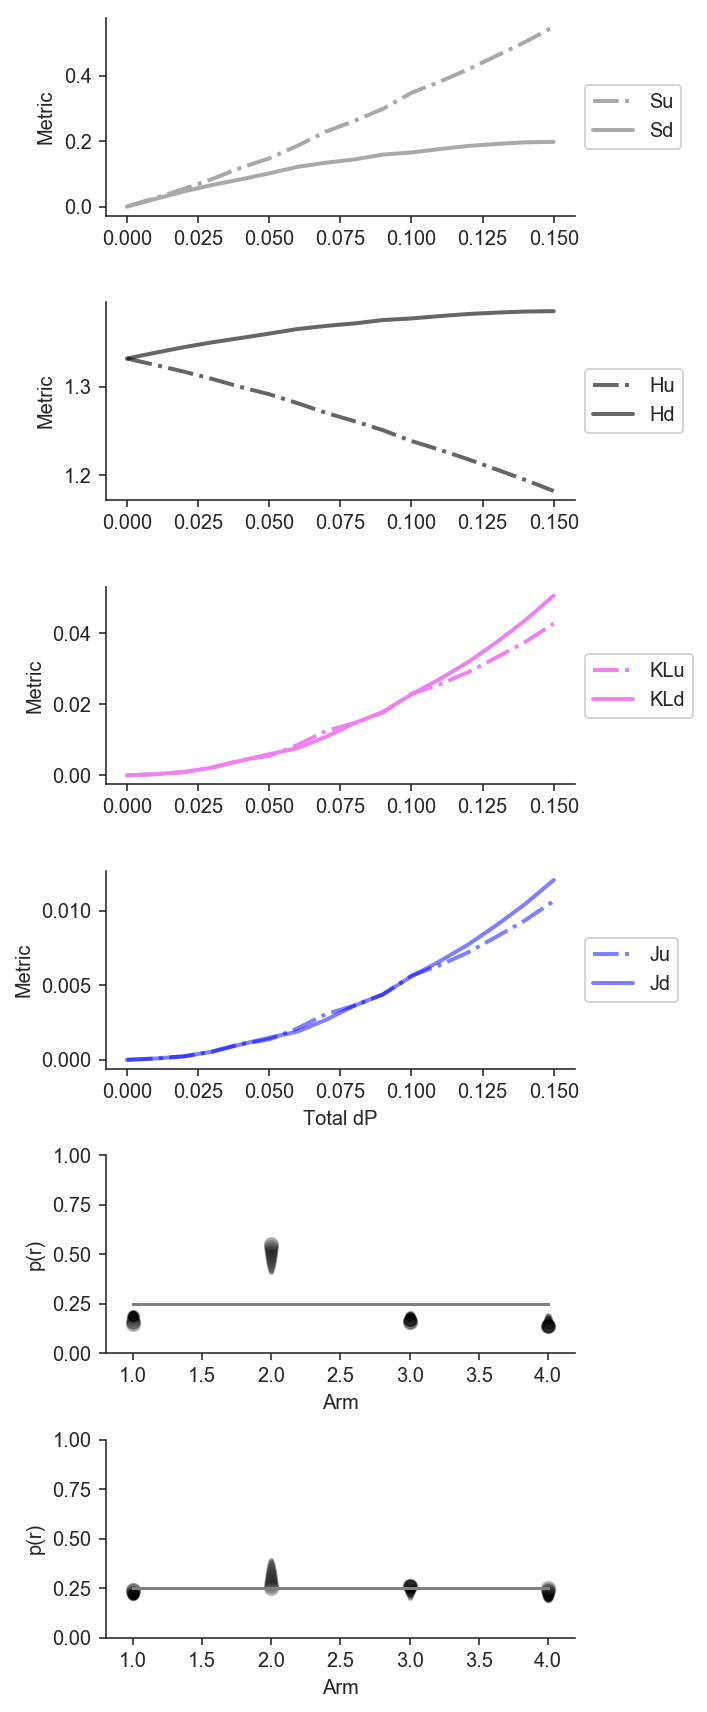

In [26]:
# --------------------------------------------
# Down
N = 15

X = generate_obs(20, 40, 20, 20)
Yd = [deepcopy(X)]
y = deepcopy(X)

r = [0, 2, 3]
for _ in range(N):
    # Find i
    loc = y.index(i)
    
    # Pick a not i to replace it
    shuffle(r)
    n = r[0]
    
    # Change to i to not i
    y[loc] = n
    
    # Save
    Yd.append(deepcopy(y))

    
Hd = [entropy(y) for y in Yd]
dHd = [entropy(y) - entropy(X) for y in Yd]
Sd = [surprisal(X, y) for y in Yd]
MId = [mutual_information(X, y) for y in Yd]
KLd = [kl_divergence(X, y) for y in Yd]
Jd = [janson_shannon(X, y) for y in Yd]
dPd = [delta_p(X, y) for y in Yd]
Ed = [delta_H(X, y) for y in Yd]

# --------------------------------------------
# Up
Yu = [deepcopy(X)]
y = deepcopy(X)
r = [0, 2, 3]
for _ in range(N):
    # Find not i
    shuffle(r)
    n = r[0]
    loc = y.index(n)
    
    # Change to i
    y[loc] = i
    
    # Save
    Yu.append(deepcopy(y))

Hu = [entropy(y) for y in Yu]
dHu = [entropy(y) - entropy(X) for y in Yu]
Su = [surprisal(X, y) for y in Yu]
MIu = [mutual_information(X, y) for y in Yu]
KLu = [kl_divergence(X, y) for y in Yu]
Ju = [janson_shannon(X, y) for y in Yu]
dPu = [delta_p(X, y) for y in Yu]
Eu = [delta_H(X, y) for y in Yu]

# -------------------------------------
ps = np.asarray(range(N+1)) / 100
fig, ax = plt.subplots(6, sharex=False, figsize=(5, 12))
ax[0].plot(ps, Su, label='Su', color="darkgrey", linewidth=2, linestyle='-.')
ax[0].plot(ps, Sd, label='Sd', color="darkgrey", linewidth=2)
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].plot(ps, Hu, label='Hu', color="black", alpha=0.6, linewidth=2, linestyle='-.')
ax[1].plot(ps, Hd, label='Hd', color="black", alpha=0.6, linewidth=2)
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[2].plot(ps, KLu, label='KLu', color="violet", linewidth=2, linestyle='-.')
ax[2].plot(ps, KLd, label='KLd', color="violet", linewidth=2)
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[3].plot(ps, Ju, label='Ju', color="blue", alpha=0.5, linewidth=2, linestyle='-.')
ax[3].plot(ps, Jd, label='Jd', color="blue", alpha=0.5, linewidth=2)
ax[3].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[0].set_ylabel("Metric")
ax[1].set_ylabel("Metric")
ax[2].set_ylabel("Metric")
ax[3].set_ylabel("Metric")
ax[3].set_xlabel("Total dP")


for n, y in enumerate(Yu):
    p = estimate_prob(y)[0]
    ax[4].scatter([1, 2, 3, 4], p, s=n*3, color="black", alpha=.2)
    ax[4].plot([1, 2, 3, 4], [0.25]*4, color="grey")
ax[4].set_ylabel("p(r)")
ax[4].set_xlabel("Arm")
ax[4].set_ylim(0, 1)

for n, y in enumerate(Yd):
    p = estimate_prob(y)[0]
    ax[5].scatter([1, 2, 3, 4], p, s=n*3, color="black", alpha=.2)
    ax[5].plot([1, 2, 3, 4], [0.25]*4, color="grey")
ax[5].set_ylabel("p(r)")
ax[5].set_xlabel("Arm")
ax[5].set_ylim(0, 1)

_ = fig.tight_layout()
_ = sns.despine()

/Users/qualia/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


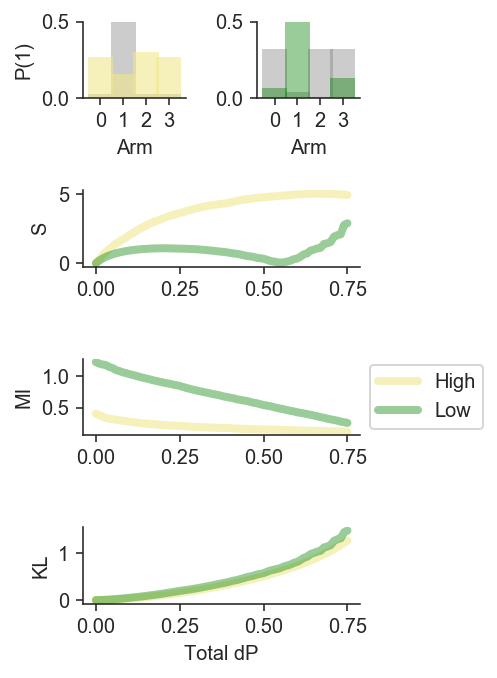

In [32]:
N = 75

# ---------------------------------------
# Positive
X = generate_obs(3, 91, 3, 3)
Y = [deepcopy(X)]
y = deepcopy(X)

r = [0, 2, 3]
for _ in range(N):
    # Find i
    loc = y.index(i)
    
    # Pick a not i to replace it
    shuffle(r)
    n = r[0]
    
    # Change to i to not i
    y[loc] = n
    
    # Save
    Y.append(deepcopy(y))

# -
Y_p = deepcopy(Y)
dH_p = [entropy(y) - entropy(X) for y in Y]
MI_p = [mutual_information(X, y) for y in Y]
S_p = [surprisal(X, y) for y in Y]
KL_p = [kl_divergence(X, y) for y in Y]

# ---------------------------------------
# Negetive
X = generate_obs(32, 4, 32, 32)
Y = [deepcopy(X)]
y = deepcopy(X)

r = [0, 2, 3]
for _ in range(N):
    # Find not i
    while True:
        shuffle(r)
        n = r[0]
        if n in y:
            loc = y.index(n)
            break
    
    # Replace w/ i
    y[loc] = i

    # Save
    Y.append(deepcopy(y))
        
# -
Y_n = deepcopy(Y)
dH_n = [entropy(y) - entropy(X) for y in Y]
MI_n = [mutual_information(X, y) for y in Y]
S_n = [surprisal(X, y) for y in Y]
KL_n = [kl_divergence(X, y) for y in Y]

# ---------------------------------------
fig = plt.figure(figsize=(3, 10))
grid = plt.GridSpec(7, 6, wspace=0.3, hspace=1.2)

# Dists
plt.subplot(grid[1:2, 0:2])
plt.bar([0, 1, 2, 3], estimate_prob(Y_p[0])[0], width=1.1, linewidth=0, color="grey", alpha=0.4)
plt.bar([0, 1, 2, 3], estimate_prob(Y_p[-1])[0], width=1.1, linewidth=0, color="khaki", alpha=0.6)
plt.ylim(0, 0.5)
plt.xticks([0, 1, 2, 3])
plt.ylabel("P(1)")
plt.xlabel("Arm")

plt.subplot(grid[1:2, 3:5])
plt.bar([0, 1, 2, 3], estimate_prob(Y_n[0])[0], width=1.1, linewidth=0, color="grey", alpha=0.4)
plt.bar([0, 1, 2, 3], estimate_prob(Y_n[-1])[0], width=1.1, linewidth=0, color="green", alpha=0.4)
plt.ylim(0, 0.5)
plt.xticks([0, 1, 2, 3])
plt.xlabel("Arm")

# Metrics
ps = np.asarray(range(N+1)) / 100

# plt.subplot(grid[2, :5])
# plt.plot(ps, np.abs(dH_p), color="khaki", alpha=0.6, linewidth=4)
# plt.plot(ps, np.abs(dH_n), color="green",  alpha=0.4, linewidth=4)
# plt.ylabel("|dH|")
# plt.xticks([0.0, 0.25, 0.5, 0.75])

plt.subplot(grid[2, :5])
plt.plot(ps, S_p, color="khaki", alpha=0.6, linewidth=4)
plt.plot(ps, S_n, color="green",  alpha=0.4, linewidth=4)
plt.ylabel("S")
plt.xticks([0.0, 0.25, 0.5, 0.75])

plt.subplot(grid[3, :5])
plt.plot(ps, MI_p, color="khaki", alpha=0.6, linewidth=4, label="High")
plt.plot(ps, MI_n, color="green",  alpha=0.4, linewidth=4, label="Low")
plt.ylabel("MI")
plt.xticks([0.0, 0.25, 0.5, 0.75])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(grid[4, :5])
plt.plot(ps, KL_p, color="khaki", alpha=0.6, linewidth=4, label="High")
plt.plot(ps, KL_n, color="green",  alpha=0.4, linewidth=4, label="Low")
plt.ylabel("KL")
plt.xlabel("Total dP")
plt.xticks([0.0, 0.25, 0.5, 0.75])


_ = fig.tight_layout()
_ = sns.despine()